# *eda-1-hls-pixel.ipynb*

# Pixel-level EDA

Produce plots of reflectance observations at a particular pixel, by year by band.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import os

import sys
sys.path.append('../src/')
import aposch_pixel_eda as ape

ModuleNotFoundError: No module named 'rasterio'

Note: we have confrimed the following about sure pixels:
- surely-Almonds in years 2018-2022 is found to be [900,50] in 10SFH
- surely-Corn in years 2018-2022 is found to be [400,1750] in 15TVG


### Example for year 2020

After filtering, there are 67 granules remaining.


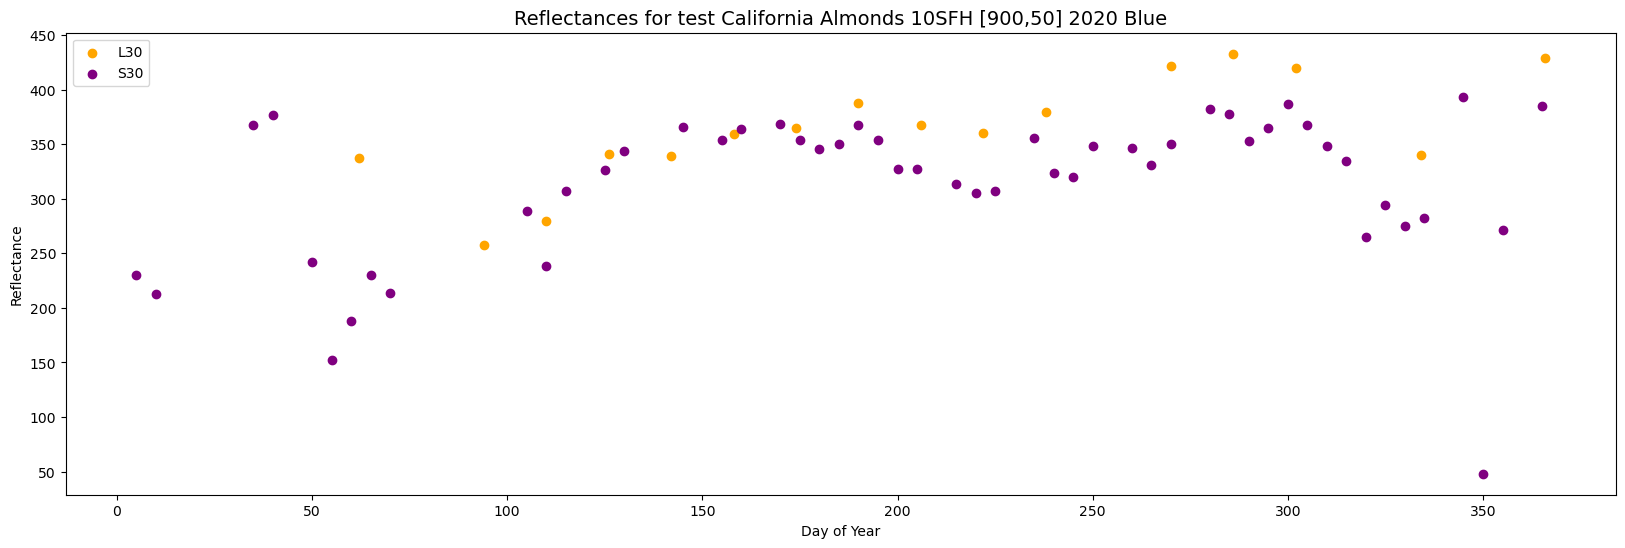

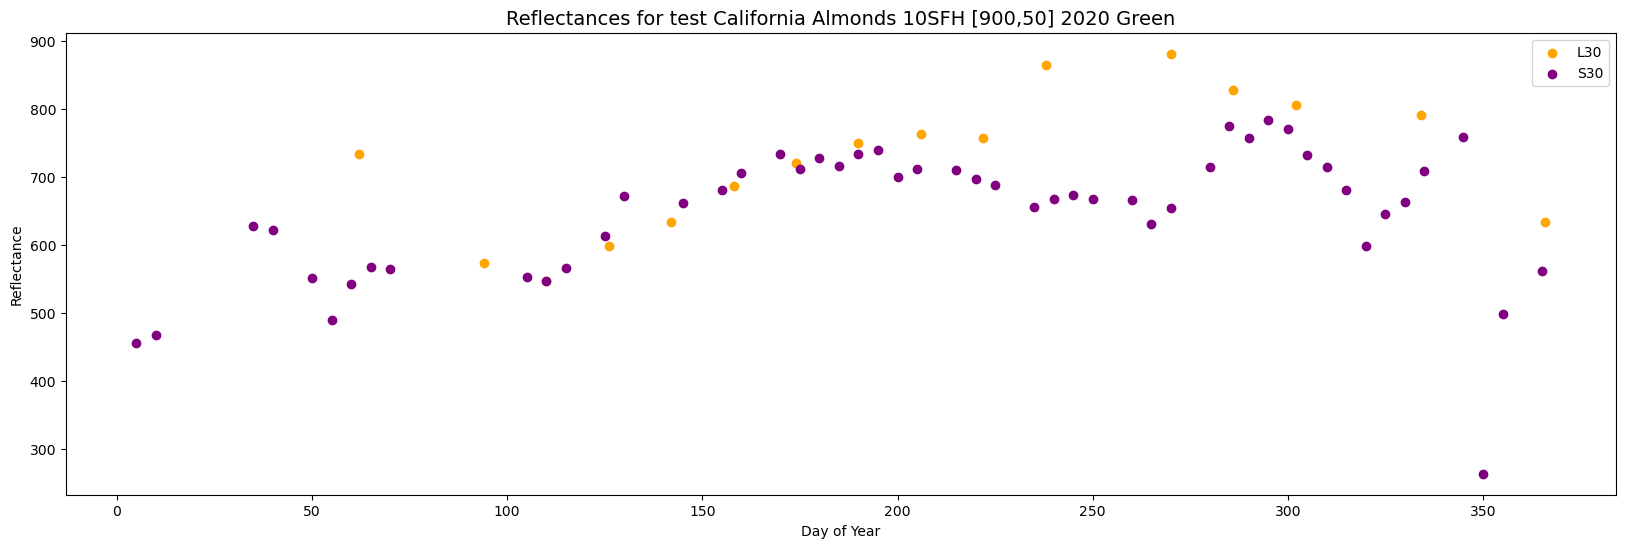

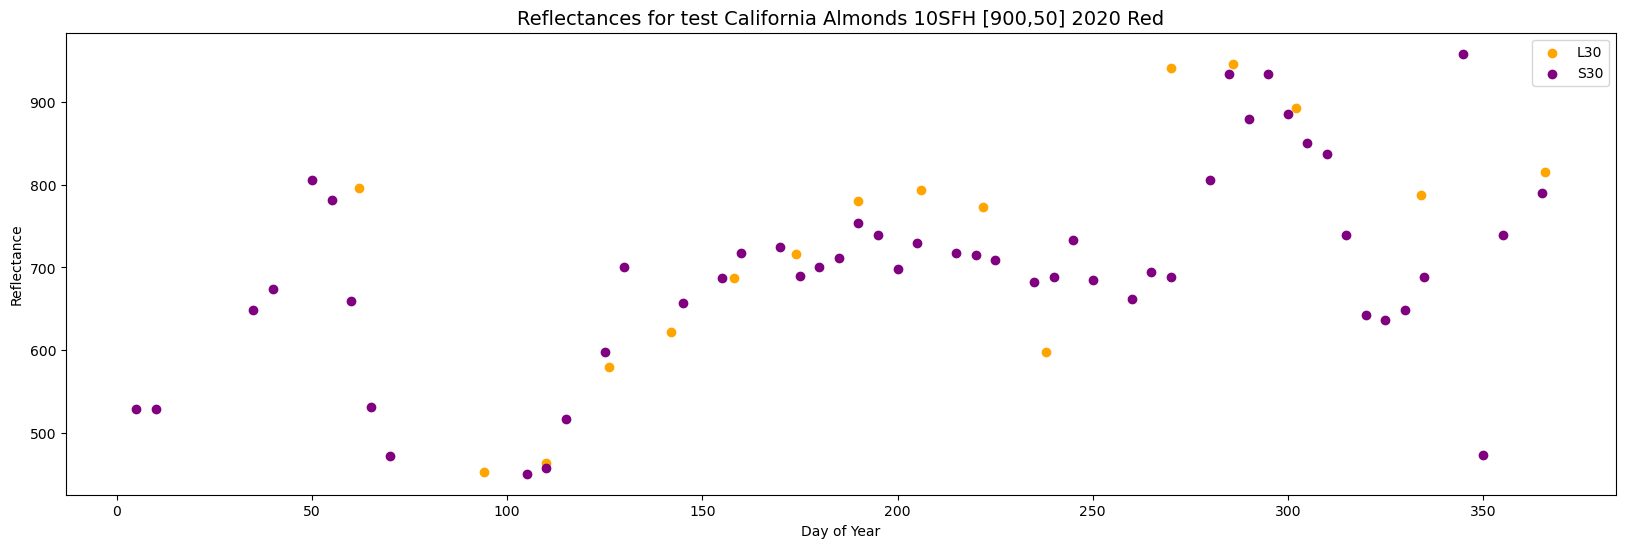

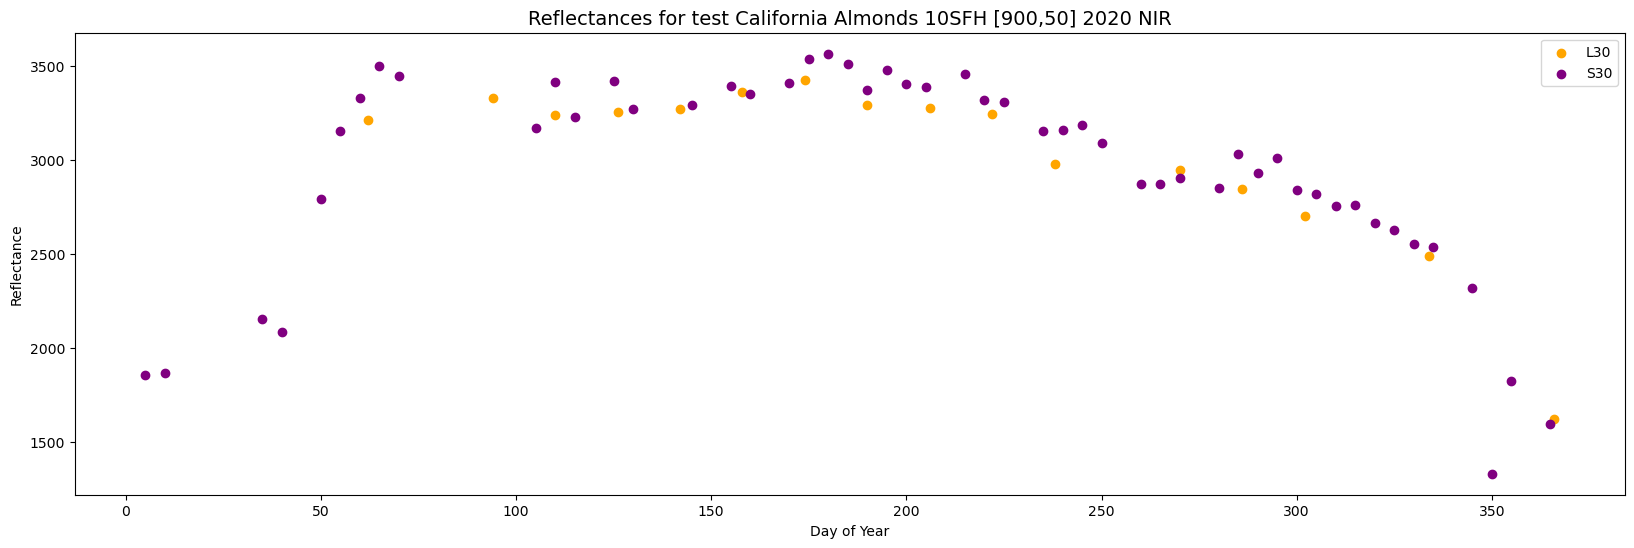

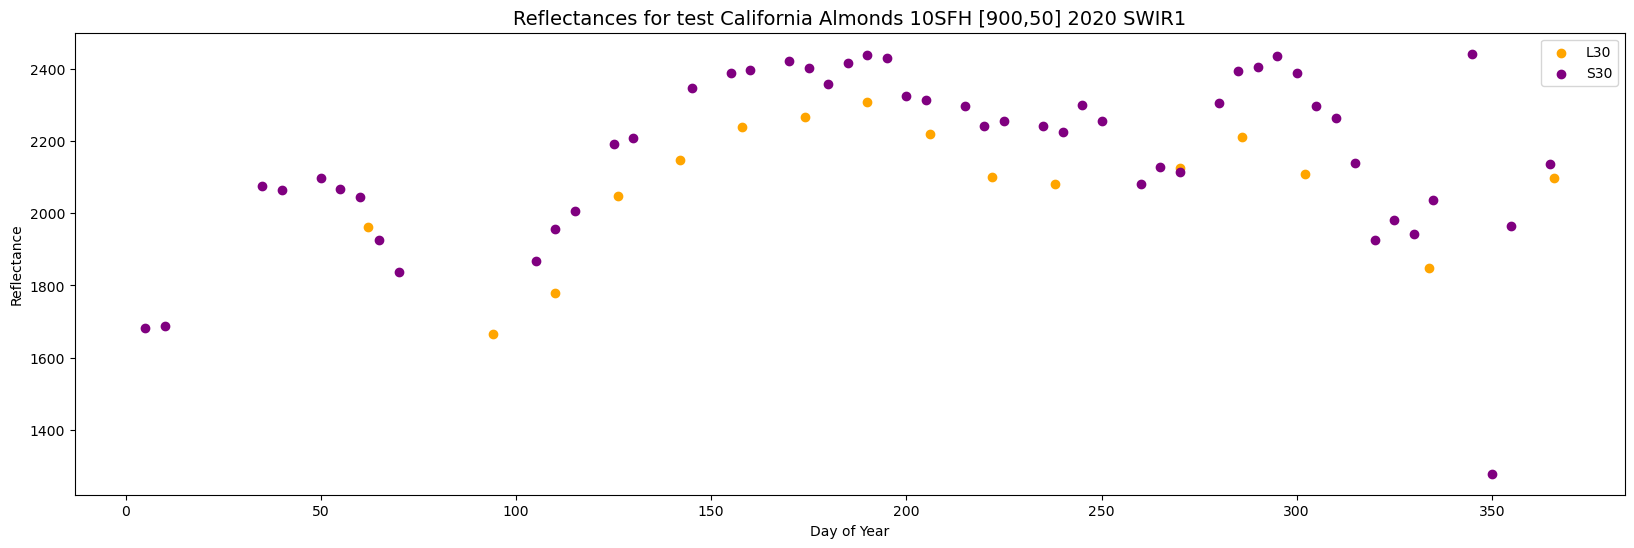

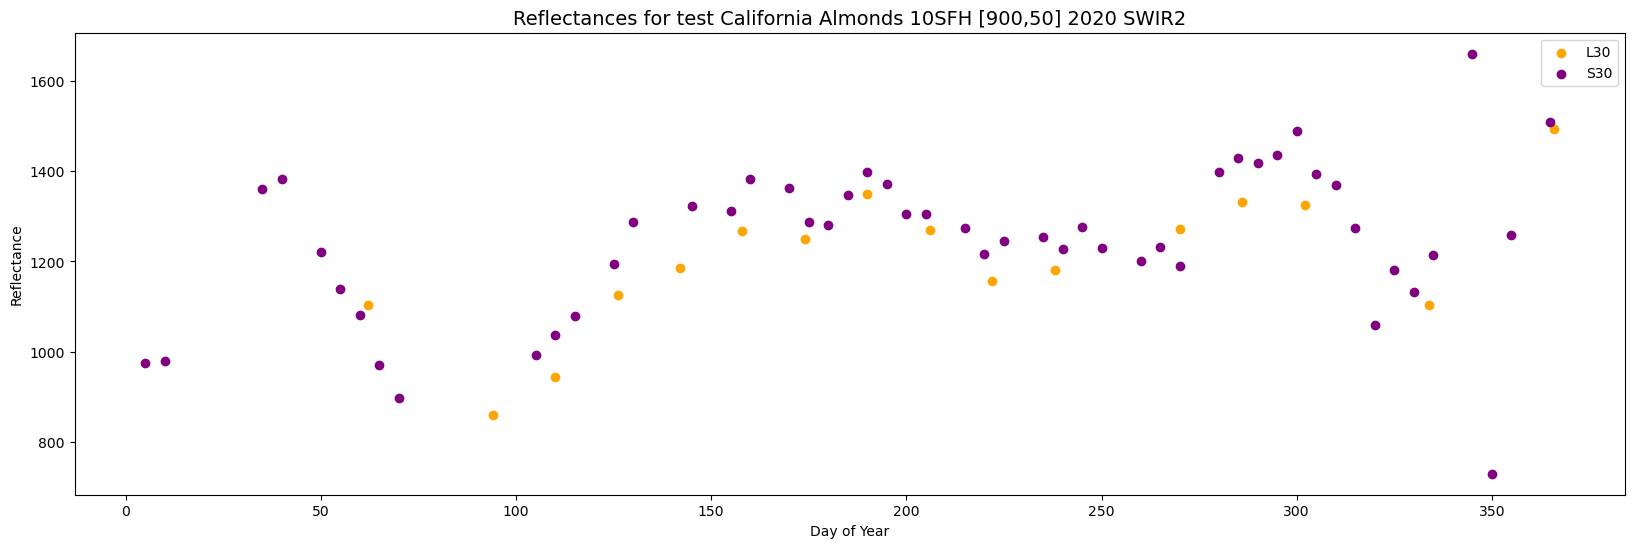

In [2]:
granule_paths = ape.list_granule_paths(tile='10SFH',
                       year=2020,
                       hls_dir='../data/hls_23feb23',
                       sats=['L30','S30'])
filtered_paths = ape.list_filtered_paths(granule_paths=granule_paths,
                   pixel=[900,50])


bands = ['Blue','Green','Red','NIR','SWIR1','SWIR2']

for band in bands:
    refls, DOYs, sats = ape.gather_data(filtered_paths,
                                band,
                                pixel=[900,50])
    ape.explore_data(refls, DOYs, sats,
             save_loc='../figures',
             tags = ['test','California','Almonds','10SFH','[900,50]',2020,band],
             show=True)



## California Almonds
### EDA visuals for all years for sure-Almond pixel

Uses a for loop.

In [3]:
hls_dir='../data/hls_23feb23'
years = range(2018,2023)
tile = '10SFH'
pixel = [900,50]
bands = ['Blue','Green','Red','NIR','SWIR1','SWIR2']
figure_save_loc = '../figures/eda-pixel/almonds'
state = 'California'
crop = 'Almonds'

for year in years:
    print(f'- Working on year {year} -')
    granule_paths = ape.list_granule_paths(tile=tile,
                           year=year,
                           hls_dir=hls_dir,
                           sats=['L30','S30'])
    filtered_paths = ape.list_filtered_paths(granule_paths=granule_paths,
                       pixel=pixel)

    for band in bands:
        refls, DOYs, sats = ape.gather_data(filtered_paths,
                                    band,
                                    pixel=pixel)
        ape.explore_data(refls, DOYs, sats,
                 save_loc=figure_save_loc,
                 tags = [state,crop,tile,str(pixel),year,band])

- Working on year 2018 -
After filtering, there are 52 granules remaining.
- Working on year 2019 -
After filtering, there are 55 granules remaining.
- Working on year 2020 -
After filtering, there are 67 granules remaining.
- Working on year 2021 -
After filtering, there are 63 granules remaining.
A file could not be read: ../data/hls_23feb23/S30/2021/10/S/F/H/HLS.S30.T10SFH.2021014T185729.v2.0/HLS.S30.T10SFH.2021014T185729.v2.0.B11.tif
Continuing as normal with the rest of the files.
- Working on year 2022 -
After filtering, there are 81 granules remaining.
A file could not be read: ../data/hls_23feb23/L30/2022/10/S/F/H/HLS.L30.T10SFH.2022323T184612.v2.0/HLS.L30.T10SFH.2022323T184612.v2.0.B05.tif
Continuing as normal with the rest of the files.
A file could not be read: ../data/hls_23feb23/L30/2022/10/S/F/H/HLS.L30.T10SFH.2022347T184607.v2.0/HLS.L30.T10SFH.2022347T184607.v2.0.B06.tif
Continuing as normal with the rest of the files.


Note:
- in 2018, we have 52 good-data pixels.
- in 2019, we have 55 good-data pixels.
- in 2020, we have 67 good-data pixels.
- in 2021, we have 63 good-data pixels.
  - this is true in all bands except SWIR1, for which we have 62.
- in 2022, we have 81 good-data pixels.
  - this is true for all except NIR amnd SWIR1, for each of which we have 80.

## Iowa Corn
### EDA visuals for all years for sure-Corn pixel

In [4]:
hls_dir='../data/hls_23feb23'
years = range(2018,2023)
tile = '15TVG'
pixel = [400,1750]
bands = ['Blue','Green','Red','NIR','SWIR1','SWIR2']
figure_save_loc = '../figures/eda-pixel/corn'
state = 'Iowa'
crop = 'Corn'

for year in years:
    print(f'- Working on year {year} -')
    granule_paths = ape.list_granule_paths(tile=tile,
                           year=year,
                           hls_dir=hls_dir,
                           sats=['L30','S30'])
    filtered_paths = ape.list_filtered_paths(granule_paths=granule_paths,
                       pixel=pixel)

    for band in bands:
        refls, DOYs, sats = ape.gather_data(filtered_paths,
                                    band,
                                    pixel=pixel)
        ape.explore_data(refls, DOYs, sats,
                 save_loc=figure_save_loc,
                 tags = [state,crop,tile,str(pixel),year,band])

- Working on year 2018 -
After filtering, there are 58 granules remaining.
- Working on year 2019 -
After filtering, there are 54 granules remaining.
- Working on year 2020 -
After filtering, there are 64 granules remaining.
- Working on year 2021 -
A file could not be read: ../data/hls_23feb23/S30/2021/15/T/V/G/HLS.S30.T15TVG.2021156T165851.v2.0/HLS.S30.T15TVG.2021156T165851.v2.0.Fmask.tif
Continuing as normal with the rest of the files.
After filtering, there are 72 granules remaining.
A file could not be read: ../data/hls_23feb23/S30/2021/15/T/V/G/HLS.S30.T15TVG.2021034T171519.v2.0/HLS.S30.T15TVG.2021034T171519.v2.0.B12.tif
Continuing as normal with the rest of the files.
- Working on year 2022 -
After filtering, there are 91 granules remaining.
A file could not be read: ../data/hls_23feb23/S30/2022/15/T/V/G/HLS.S30.T15TVG.2022091T165851.v2.0/HLS.S30.T15TVG.2022091T165851.v2.0.B03.tif
Continuing as normal with the rest of the files.


### Iowa Corn pixel again, but without any snowy observations

In [3]:
hls_dir='../data/hls_23feb23'
years = range(2018,2023)
tile = '15TVG'
pixel = [400,1750]
bands = ['Blue','Green','Red','NIR','SWIR1','SWIR2']
figure_save_loc = '../figures/eda-pixel/corn-no-snow'
state = 'Iowa'
crop = 'Corn'

for year in years:
    print(f'- Working on year {year} -')
    granule_paths = ape.list_granule_paths(tile=tile,
                           year=year,
                           hls_dir=hls_dir,
                           sats=['L30','S30'])
    filtered_paths = ape.list_filtered_paths(granule_paths=granule_paths,
                        pixel=pixel,
                        remove_if_snow=True)

    for band in bands:
        refls, DOYs, sats = ape.gather_data(filtered_paths,
                                    band,
                                    pixel=pixel)
        ape.explore_data(refls, DOYs, sats,
                 save_loc=figure_save_loc,
                 tags = [state,crop,tile,str(pixel),
                         year,band,'Snow-Removed'])

- Working on year 2018 -
After filtering, there are 50 granules remaining.
- Working on year 2019 -
A file could not be read: ../data/hls_23feb23/L30/2019/15/T/V/G/HLS.L30.T15TVG.2019212T165928.v2.0/HLS.L30.T15TVG.2019212T165928.v2.0.B02.tif
Continuing as normal with the rest of the files.
After filtering, there are 45 granules remaining.
- Working on year 2020 -
After filtering, there are 55 granules remaining.
- Working on year 2021 -
A file could not be read: ../data/hls_23feb23/S30/2021/15/T/V/G/HLS.S30.T15TVG.2021039T171451.v2.0/HLS.S30.T15TVG.2021039T171451.v2.0.B02.tif
Continuing as normal with the rest of the files.
A file could not be read: ../data/hls_23feb23/S30/2021/15/T/V/G/HLS.S30.T15TVG.2021156T165851.v2.0/HLS.S30.T15TVG.2021156T165851.v2.0.Fmask.tif
Continuing as normal with the rest of the files.
After filtering, there are 66 granules remaining.
- Working on year 2022 -
A file could not be read: ../data/hls_23feb23/S30/2022/15/T/V/G/HLS.S30.T15TVG.2022101T165851.v2.0/H

## Appendix:

How did we choose the surely-Almond pixel? See the other notebook called eda-0-choose-sure-pixel.
